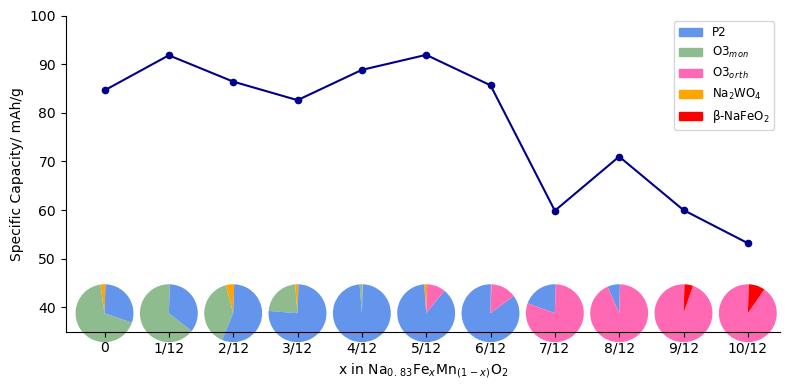

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define data
X_AXIS = ('0', '1/12', '2/12', '3/12', '4/12', '5/12', '6/12', '7/12', '8/12', '9/12', '10/12')

data = {
    'Na$_2$WO$_4$':       (2.85,  0.0, 4.67,  1.86,  0.33, 1.62,   0.30,  0.0,  0.12,  0.0, 0.0),
    'O3$_m$$_o$$_n$':     (67.43, 65, 39.66, 22.43, 1.44,  0.0,   0.0,   0.0,  0.0,   0.0, 0.0),
    'P2':                 (29.72, 35, 55.68, 75.71, 98.23, 88.11, 85.43, 20,  6.97,  0.0, 0.0),
    'O3$_o$$_r$$_t$$_h$': (0.0,   0.0, 0.0,   0.0,   0.0,   10.28, 14.27, 80,  92.92, 100, 100),
    'β-NaFeO$_2$':  (0,     0,   0,     0,     0,    0,      0,     0,    0,     5,   10),
}

specific_capacity_50_cycles = {
    '0': 84.6,
    '1/12': 91.82,
    '2/12': 86.41,
    '3/12': 82.6,
    '4/12': 88.82,
    '5/12': 91.91,
    '6/12': 85.65,
    '7/12': 59.88,
    '8/12': 71,
    '9/12': 60,
    '10/12': 53.2,
}


# Create figure and axes
fig, ax_pie = plt.subplots(figsize=(8, 4))  # Axis for pie chart
ax_line = ax_pie.twinx()  # Axis for line graph

# Define custom color map
custom_colors = {
    'P2': 'cornflowerblue',
    'O3$_m$$_o$$_n$': 'darkseagreen',
    'O3$_o$$_r$$_t$$_h$': 'hotpink',
    'Na$_2$WO$_4$': 'orange',
    'β-NaFeO$_2$': 'red',
}

# Plotting separate pie charts for each value of x
for i, x_value in enumerate(X_AXIS):
    phases = list(data.keys())
    values = [data[phase][X_AXIS.index(x_value)] if X_AXIS.index(x_value) < len(data[phase]) else np.nan for phase in phases]
    values = [0 if np.isnan(value) else value for value in values]
    labels = [phase for phase, value in zip(phases, values) if value != 0]
    values = [value for value in values if value != 0]
    
    # Plot pie chart as annotation with startangle set to 270
    patches, _ = ax_pie.pie(values, labels=None, startangle=88, colors=[custom_colors[label] for label in labels], wedgeprops=None, radius=0.45,
           center=(X_AXIS.index(x_value), -2.17))

# Plot the line graph
ax_line.plot(range(len(X_AXIS)), list(specific_capacity_50_cycles.values()), color='darkblue', marker='o', linestyle='-', markersize=4.5)

# Set x-axis ticks and labels for the pie chart
ax_pie.set_xticks(range(len(X_AXIS)))
ax_pie.set_xticklabels(X_AXIS)
ax_pie.set_xlabel('x in Na$_0$$_.$$_8$$_3$Fe$_x$Mn$_($$_1$$_-$$_x$$_)$O$_2$')

# Set y-axis limits for the pie chart
ax_pie.set_ylim(-1, 1)
ax_pie.yaxis.set_visible(False)

# Set y-axis limits for the line graph
ax_line.set_ylim(35, 100)
ax_line.set_ylabel('Specific Capacity/ mAh/g', color='black')

# Extend x-axis lower than zero
ax_pie.set_xlim(-0.6, len(X_AXIS) - 0.5)

# Move y-axis to the left
ax_line.yaxis.tick_left()

# Move y-axis label to the left
ax_line.yaxis.set_label_position('left')

# Remove spines (box around the plot) for both axes
ax_pie.spines['top'].set_visible(False)
ax_pie.spines['right'].set_visible(False)
ax_pie.spines['left'].set_visible(True)  # Moved to left
ax_pie.spines['bottom'].set_visible(True)  # Retain bottom spine for x-axis
ax_line.spines['top'].set_visible(False)
ax_line.spines['right'].set_visible(False)
ax_line.spines['left'].set_visible(True)  # Retain left spine
ax_line.spines['bottom'].set_visible(True)  # Retain bottom spine for x-axis

legend_patches = [mpatches.Patch(color=color, label=label) for label, color in custom_colors.items()]
ax_line.legend(handles=legend_patches, loc='upper right', fontsize=8.5)

output_file = "/Users/harryfyjis-walker/Desktop/Part II Stuff/figures/2PieChartCapacity750Series.pdf"
plt.savefig(output_file, format='pdf')

plt.tight_layout()
plt.show()
